<a href="https://colab.research.google.com/github/Jxiong6/Date-mining-project/blob/main/DMT_EDA_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import gc

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

train = r"/content/drive/My Drive/DMT data/training_set_VU_DM.csv"
df_train = pd.read_csv(train)

In [ ]:
import pandas as pd


# 计算最小值
min_values = df_train.min()

# 计算最大值
max_values = df_train.max()

# 计算标准差
std_values = df_train.std()

# 计算均值
mean_values = df_train.mean()

# 将结果存储在一个新的DataFrame中
df_train_stats = pd.DataFrame({'Min': min_values, 'Max': max_values, 'Std': std_values, 'Mean': mean_values})

# 打印描述性统计结果
print(df_train_stats)


In [ ]:
# df_train.head(30)

In [ ]:
# the shape of the data
print("the shape of the data ",df_train.shape)
# the name of the columns
print(df_train.columns)


the shape of the data  (4958347, 54)
Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'c

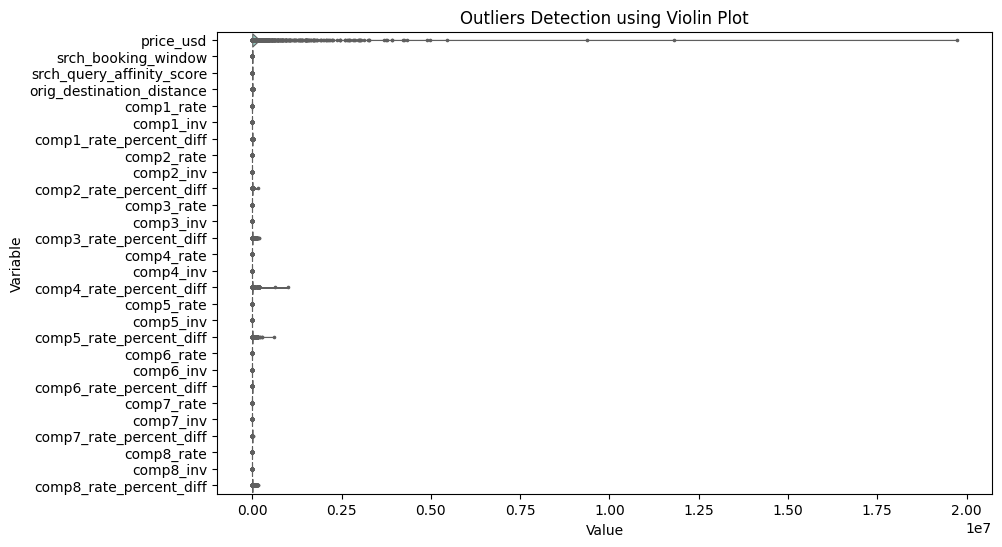

In [ ]:
# Select the numeric columns for outlier detection
features = [
            'price_usd',
            'srch_booking_window', 'srch_query_affinity_score', 'orig_destination_distance',
            'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff',
            'comp2_rate', 'comp2_inv','comp2_rate_percent_diff',
            'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff',
            'comp4_rate','comp4_inv', 'comp4_rate_percent_diff',
            'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff',
            'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff',
            'comp7_rate', 'comp7_inv','comp7_rate_percent_diff',
            'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff',
            ]


# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_train[features], inner="points", linewidth=0.8, scale="width", palette="Set3", orient='h')

# Customize the plot
plt.xlabel('Value')
plt.ylabel('Variable')
plt.title('Outliers Detection using Violin Plot')

# Show the plot
plt.show()

In [ ]:
# Check for missing values
df_train.isnull().sum(axis = 0)

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

In [ ]:
# import missingno as msno
# # visualize the missing values
# msno.bar(df_train)

In [ ]:
df_train.describe

<bound method NDFrame.describe of          srch_id            date_time  site_id  visitor_location_country_id  \
0              1  2013-04-04 08:32:15       12                          187   
1              1  2013-04-04 08:32:15       12                          187   
2              1  2013-04-04 08:32:15       12                          187   
3              1  2013-04-04 08:32:15       12                          187   
4              1  2013-04-04 08:32:15       12                          187   
...          ...                  ...      ...                          ...   
4958342   332785  2013-06-30 19:55:18        5                          219   
4958343   332785  2013-06-30 19:55:18        5                          219   
4958344   332785  2013-06-30 19:55:18        5                          219   
4958345   332785  2013-06-30 19:55:18        5                          219   
4958346   332785  2013-06-30 19:55:18        5                          219   

         visitor_

<Axes: xlabel='prop_country_id', ylabel='count'>

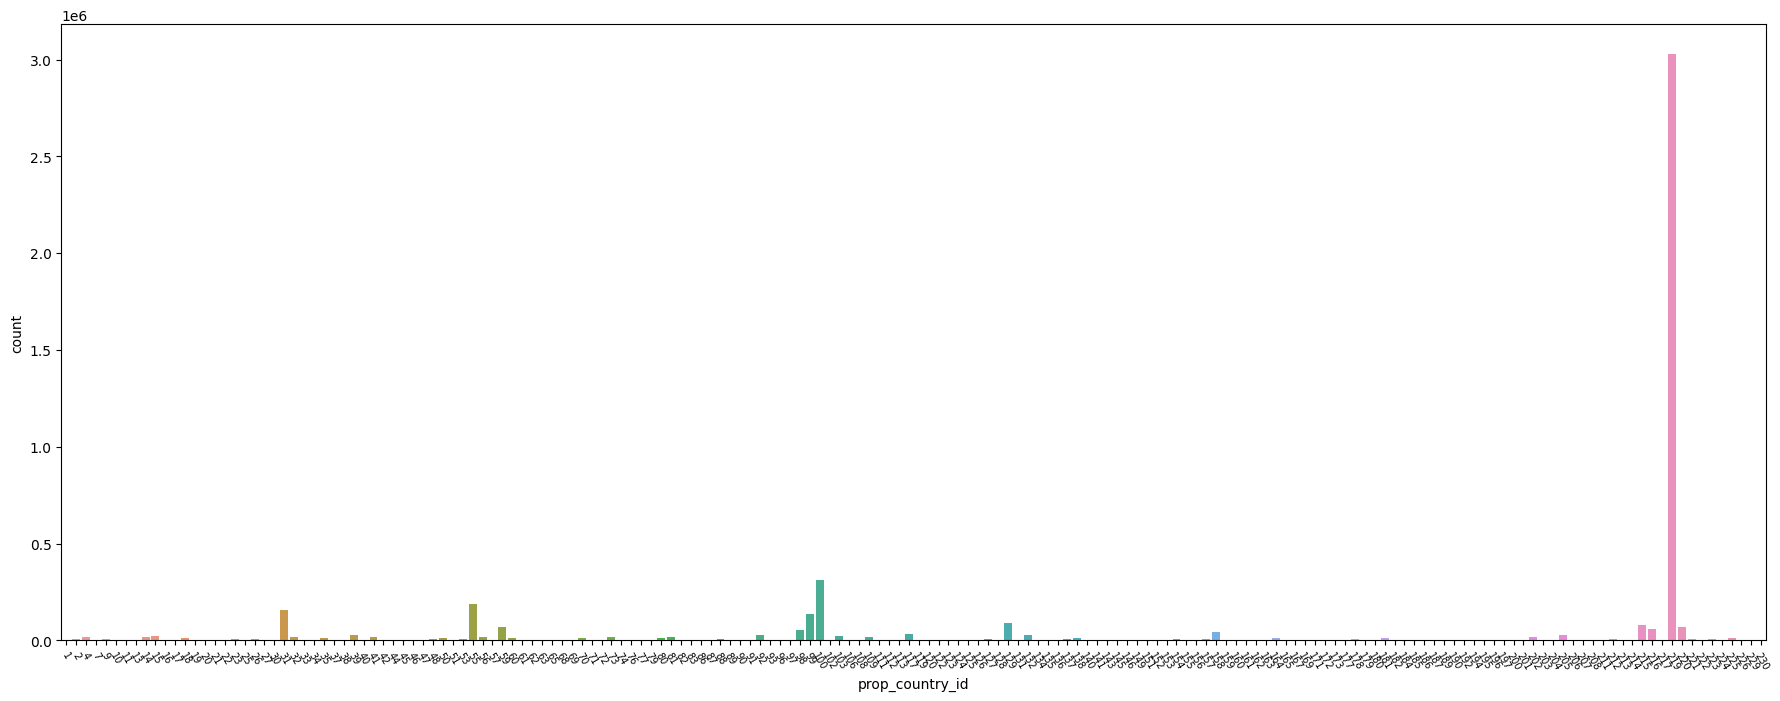

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# ID of country hotel is located in
plt.figure(figsize = (22,8))
plt.xticks(rotation = -60, size =7, weight = 'medium')
sns.countplot(x='prop_country_id', data=df_train)

<Axes: xlabel='visitor_location_country_id', ylabel='count'>

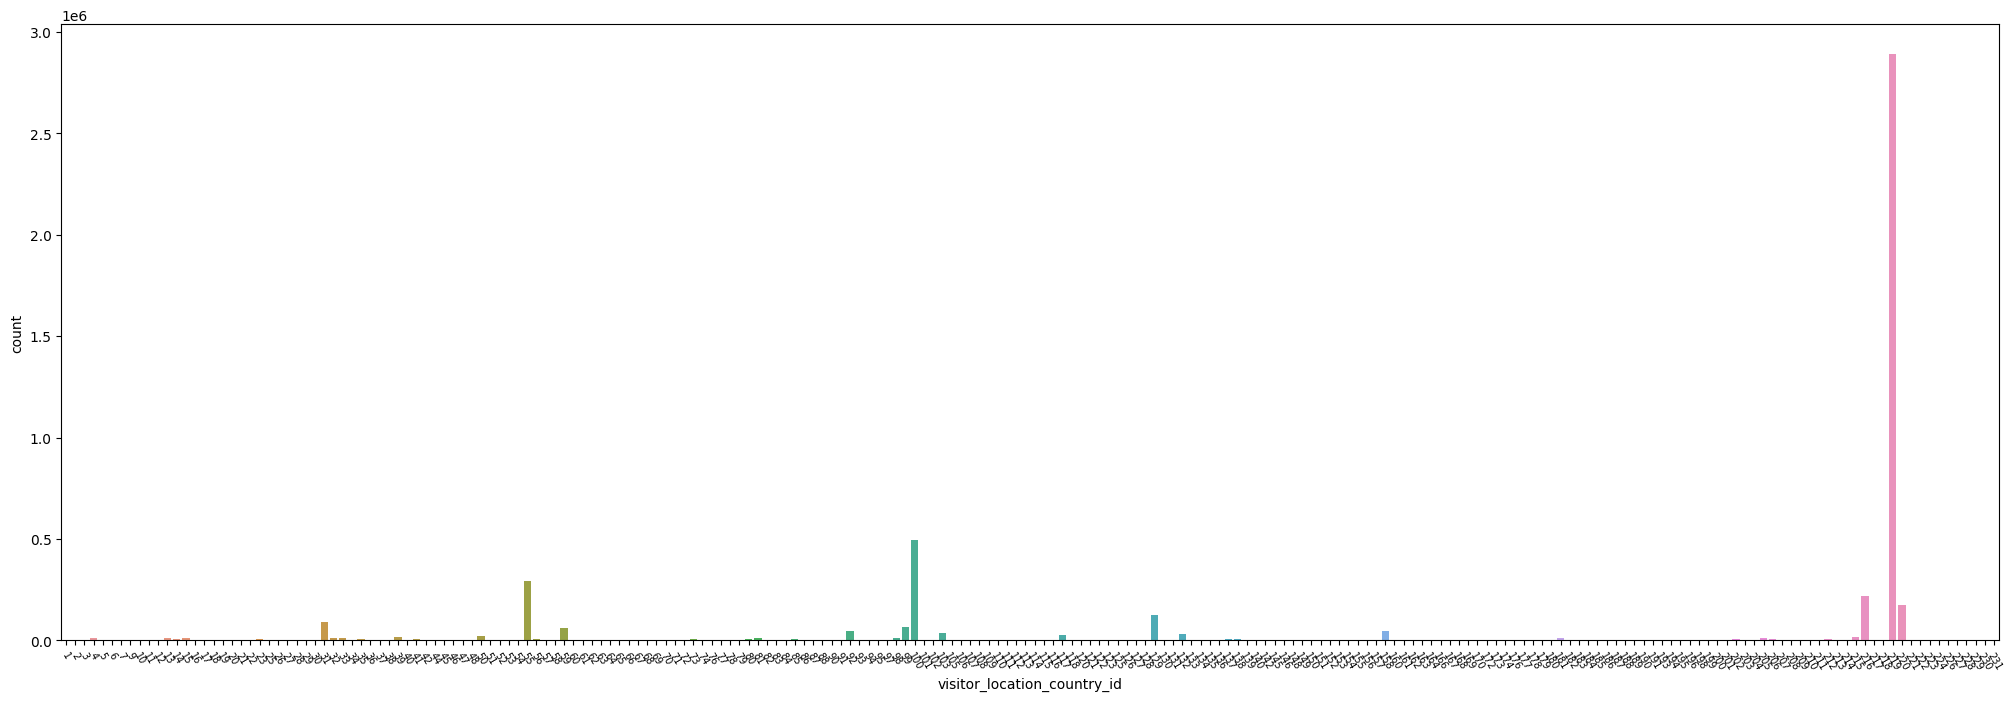

In [ ]:
#Count by country of visitor origin
plt.figure(figsize = (25,8))
plt.xticks(rotation = -60, size =7, weight = 'medium')
sns.countplot(x='visitor_location_country_id', data=df_train)

In [ ]:
#缺失值的百分比
nulls = (df_train.isnull().sum()/len(df_train))*100
nulls = pd.DataFrame(nulls)
nulls.reset_index(inplace=True)
nulls = nulls.sort_values(by = 0, ascending = False)
nulls

,index,0
29,comp1_rate_percent_diff,98.095353
44,comp6_rate_percent_diff,98.060362
27,comp1_rate,97.581250
28,comp1_inv,97.387053
38,comp4_rate_percent_diff,97.356256
52,gross_bookings_usd,97.208949
47,comp7_rate_percent_diff,97.206428
42,comp6_rate,95.156511
4,visitor_hist_starrating,94.920364
5,visitor_hist_adr_usd,94.897735


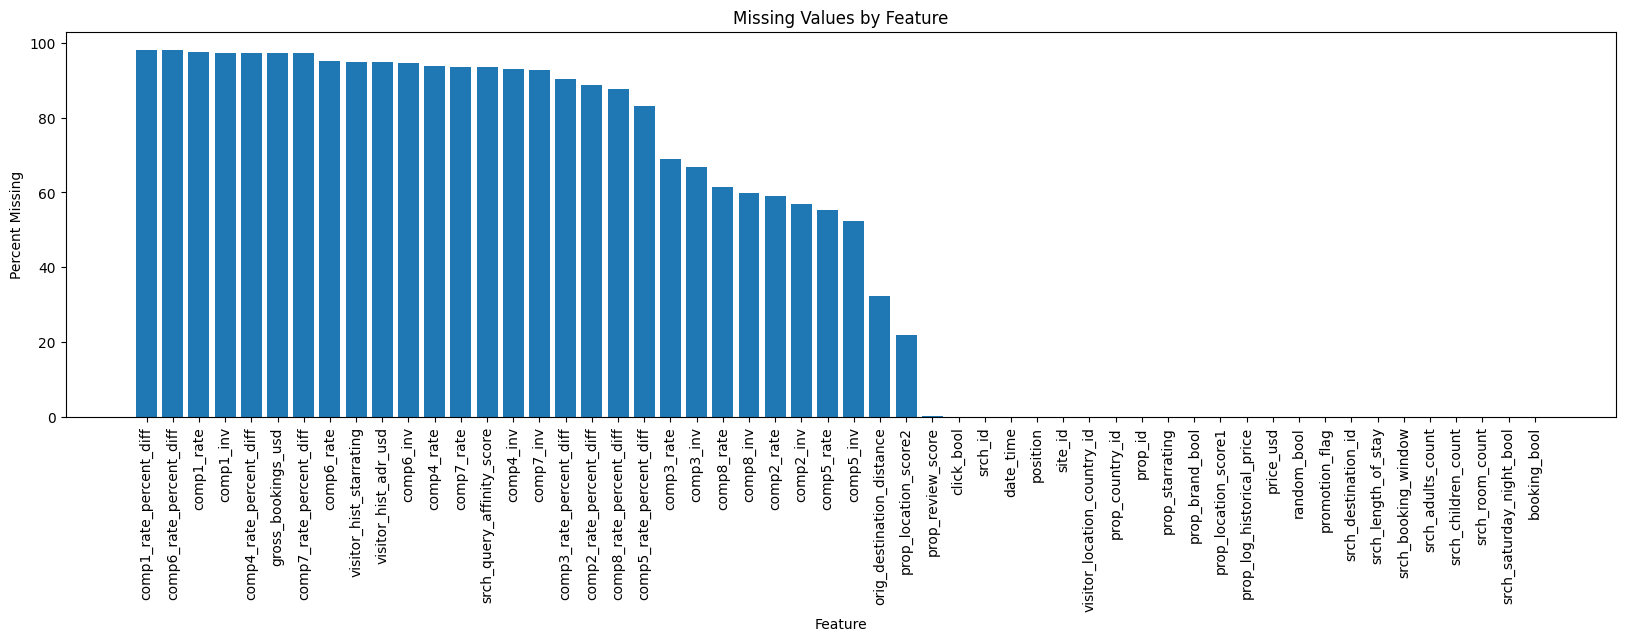

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 5))
features = nulls['index']
values = nulls[0]
ax.bar(features, values)
ax.set_xticklabels(features, rotation=90)
ax.set_title("Missing Values by Feature")
ax.set_ylabel("Percent Missing")
ax.set_xlabel("Feature")

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

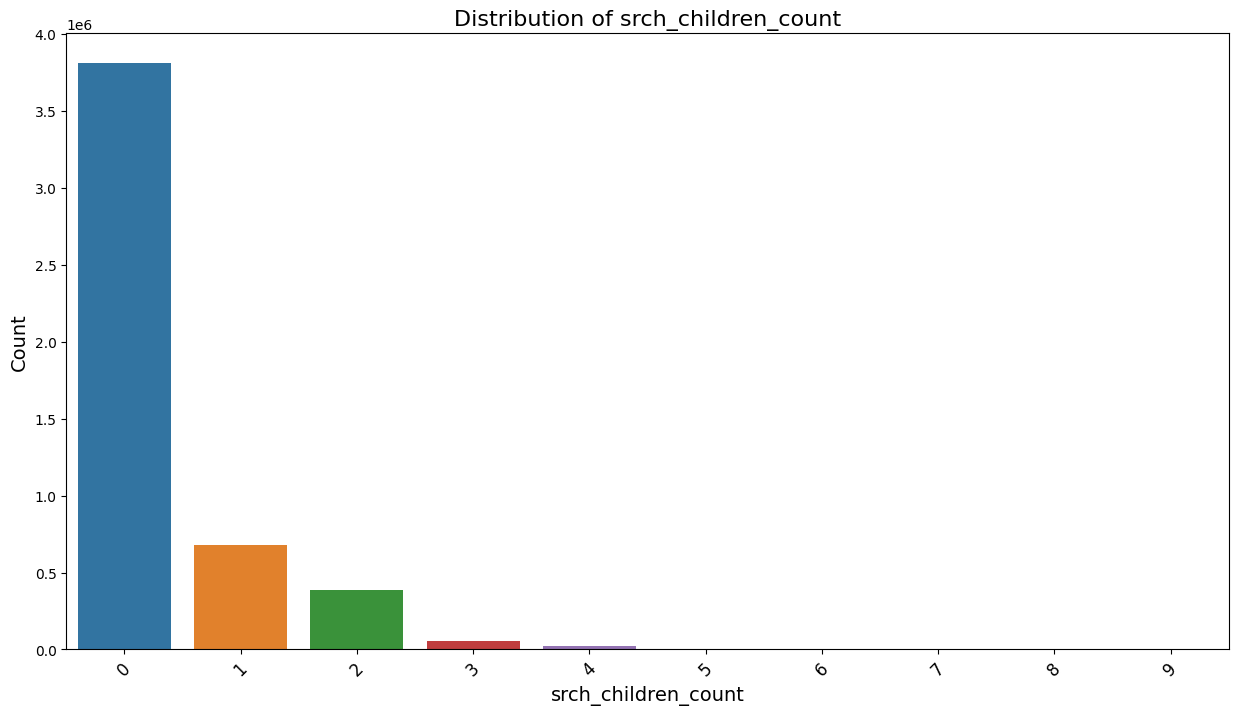

In [ ]:
#The number of (extra occupancy) children specified in the hotel room
plt.figure(figsize=(15, 8))  # 设置画布大小为15x8英寸
sns.countplot(x='srch_children_count', data=df_train)  # 绘制计数柱形图
plt.xticks(rotation=45, size=12)  # 旋转x轴刻度45度并设置刻度标签字体大小为12
plt.title('Distribution of srch_children_count', size=16)  # 添加图形标题并设置字体大小为16
plt.xlabel('srch_children_count', size=14)  # 添加x轴标签并设置字体大小为14
plt.ylabel('Count', size=14)  # 添加y轴标签并设置字体大小为14
plt.show()  # 显示图形

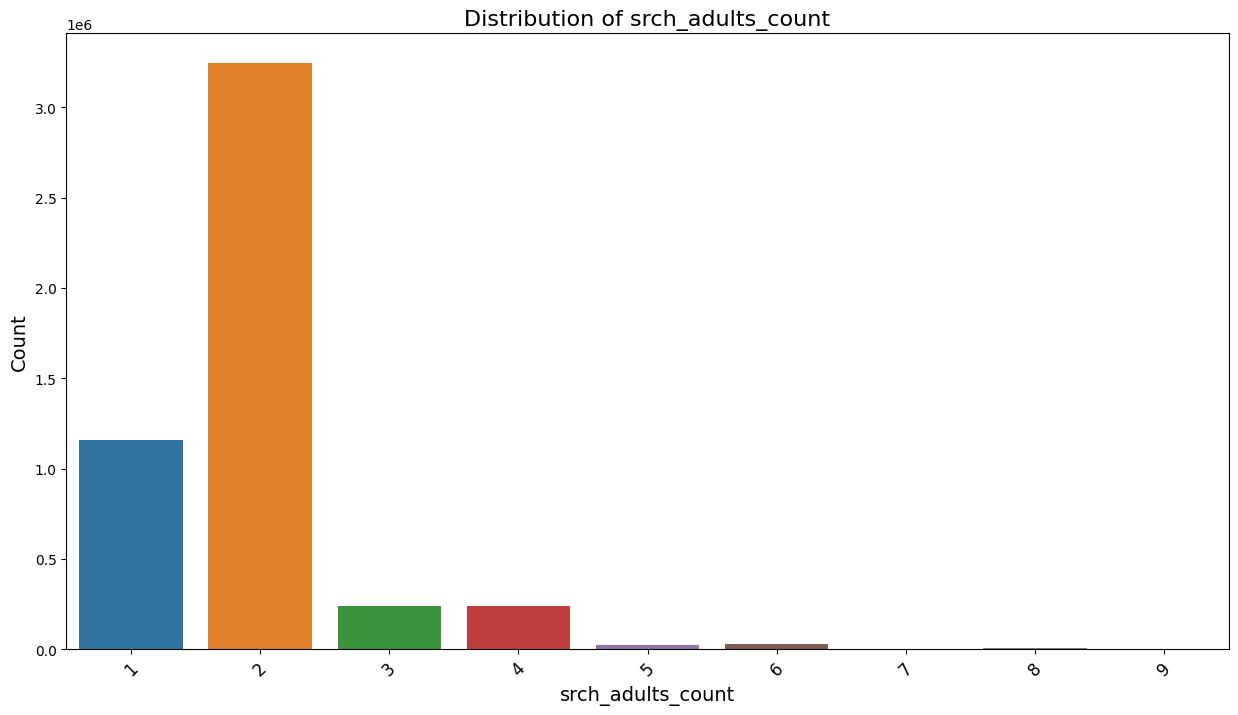

In [ ]:
plt.figure(figsize=(15, 8))  # 设置画布大小为15x8英寸
sns.countplot(x='srch_adults_count', data=df_train)  # 绘制计数柱形图
plt.xticks(rotation=45, size=12)  # 旋转x轴刻度45度并设置刻度标签字体大小为12
plt.title('Distribution of srch_adults_count', size=16)  # 添加图形标题并设置字体大小为16
plt.xlabel('srch_adults_count', size=14)  # 添加x轴标签并设置字体大小为14
plt.ylabel('Count', size=14)  # 添加y轴标签并设置字体大小为14
plt.show()  # 显示图形

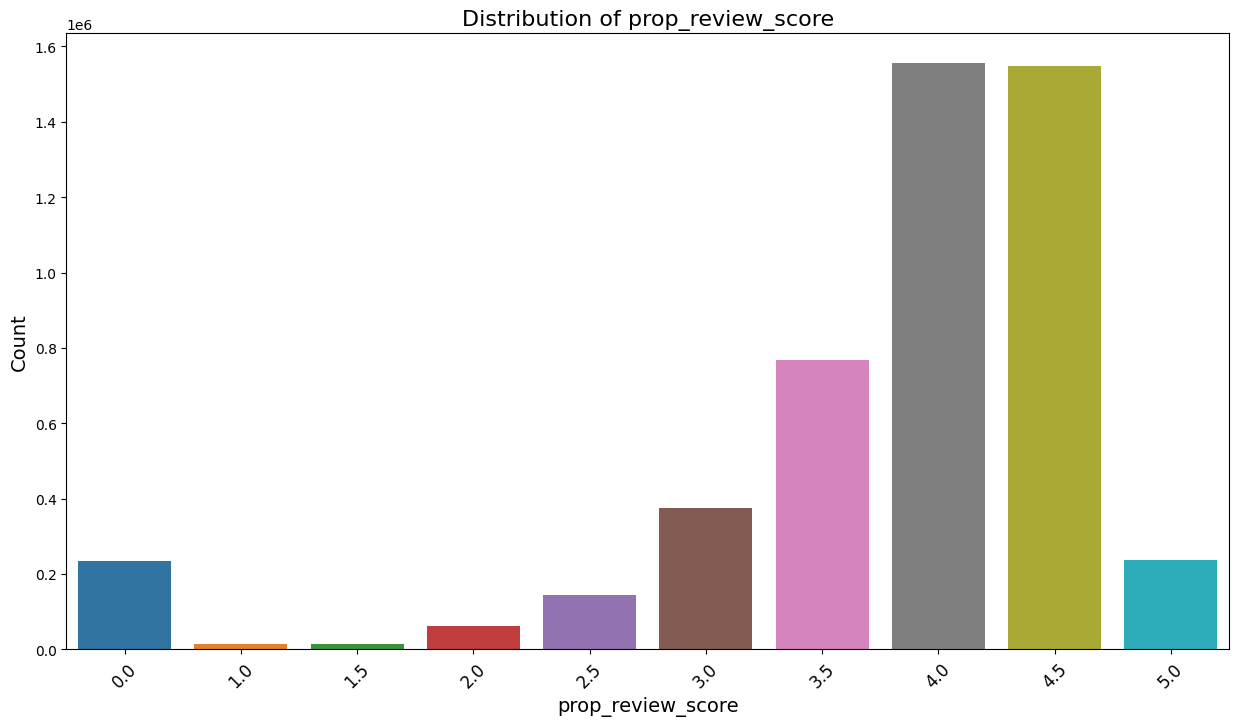

In [ ]:
#该酒店的顾客评论平均分，满分为5分，四舍五入为0.5分。
#0表示没有任何评论，空表示该酒店没有任何评论。

plt.figure(figsize=(15, 8))  # 设置画布大小为15x8英寸
sns.countplot(x='prop_review_score', data=df_train)  # 绘制计数柱形图
plt.xticks(rotation=45, size=12)  # 旋转x轴刻度45度并设置刻度标签字体大小为12
plt.title('Distribution of prop_review_score', size=16)  # 添加图形标题并设置字体大小为16
plt.xlabel('prop_review_score', size=14)  # 添加x轴标签并设置字体大小为14
plt.ylabel('Count', size=14)  # 添加y轴标签并设置字体大小为14
plt.show()  # 显示图形

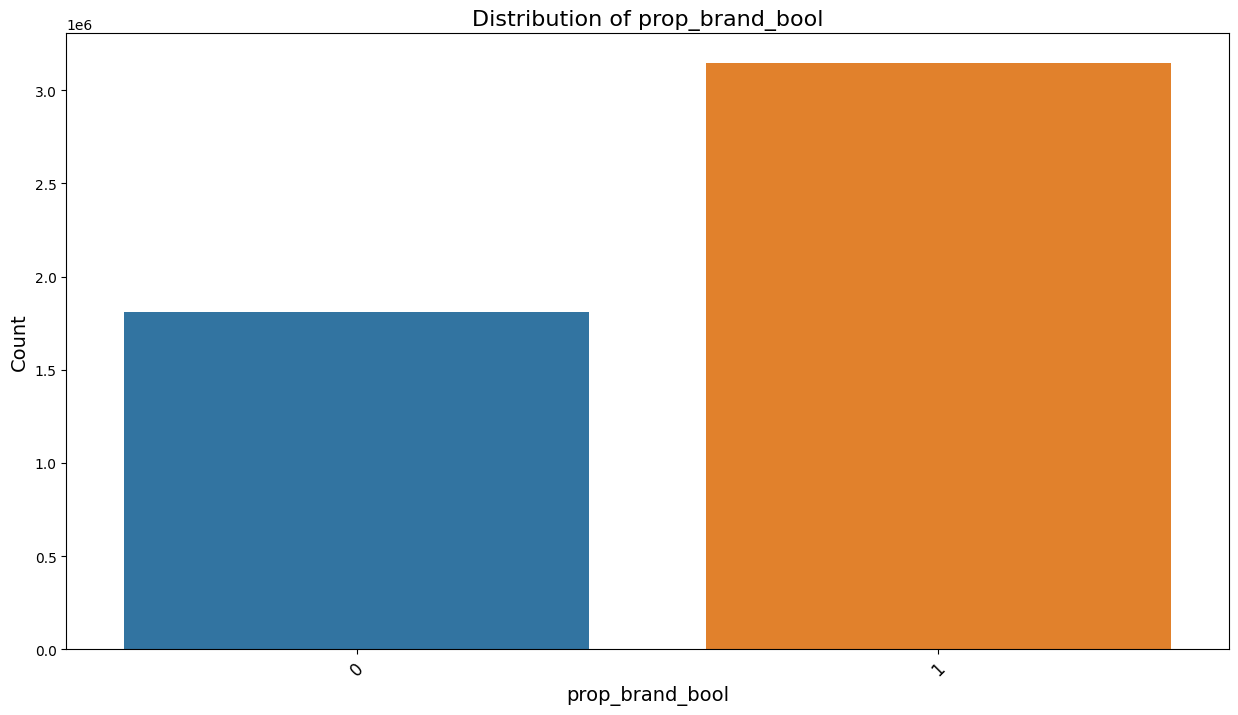

In [ ]:
#如果酒店是大型连锁酒店的一部分，则+1；如果是0，则是独立酒店
plt.figure(figsize=(15, 8))  # 设置画布大小为15x8英寸
sns.countplot(x='prop_brand_bool', data=df_train)  # 绘制计数柱形图
plt.xticks(rotation=45, size=12)  # 旋转x轴刻度45度并设置刻度标签字体大小为12
plt.title('Distribution of prop_brand_bool', size=16)  # 添加图形标题并设置字体大小为16
plt.xlabel('prop_brand_bool', size=14)  # 添加x轴标签并设置字体大小为14
plt.ylabel('Count', size=14)  # 添加y轴标签并设置字体大小为14
plt.show()  # 显示图形

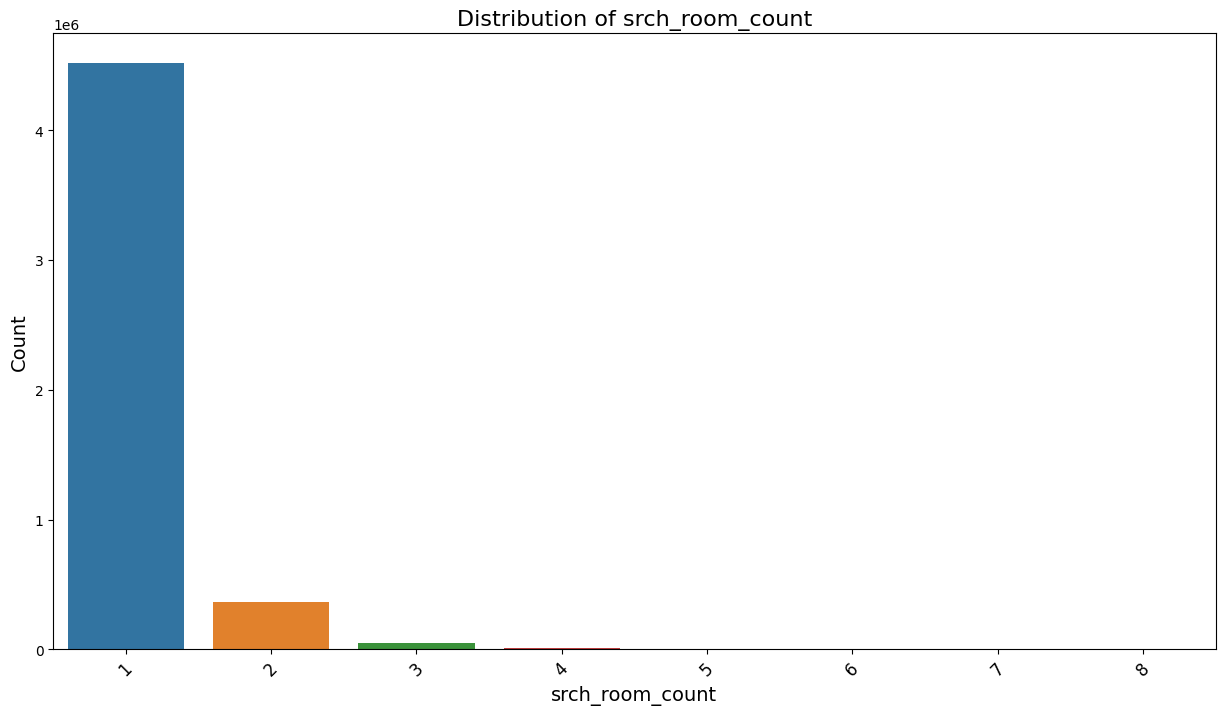

In [ ]:
# 搜索中指定的酒店房间数量
plt.figure(figsize=(15, 8))  # 设置画布大小为15x8英寸
sns.countplot(x='srch_room_count', data=df_train)  # 绘制计数柱形图
plt.xticks(rotation=45, size=12)  # 旋转x轴刻度45度并设置刻度标签字体大小为12
plt.title('Distribution of srch_room_count', size=16)  # 添加图形标题并设置字体大小为16
plt.xlabel('srch_room_count', size=14)  # 添加x轴标签并设置字体大小为14
plt.ylabel('Count', size=14)  # 添加y轴标签并设置字体大小为14
plt.show()  # 显示图形

In [ ]:
# #srch_room_count: Number of hotel rooms specified in the search
# plt.figure(figsize = (10,5))
# plt.xticks(rotation = 0, size =20)
# sns.countplot(x='srch_room_count', data=df_train)

Text(0, 0.5, 'Price')

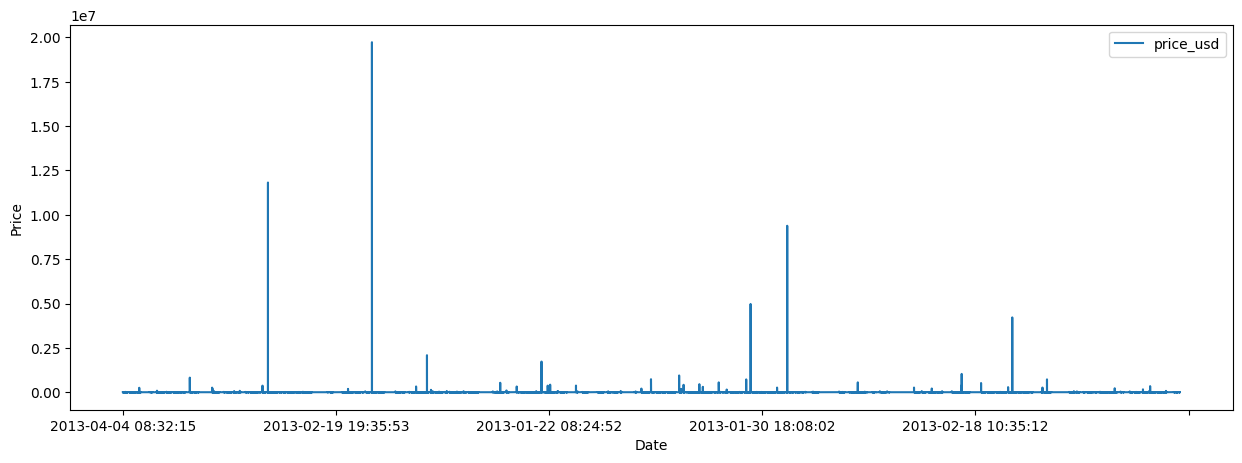

In [ ]:
df_train.plot(x='date_time',y='price_usd',figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Price')

In [ ]:
#comp1_rate： 如果Expedia的酒店价格低于竞争者1，则为+1；如果相同，则为0；
# -1 如果Expedia的价格高于竞争者1；null表示没有竞争数据

<Axes: xlabel='comp1_rate', ylabel='count'>

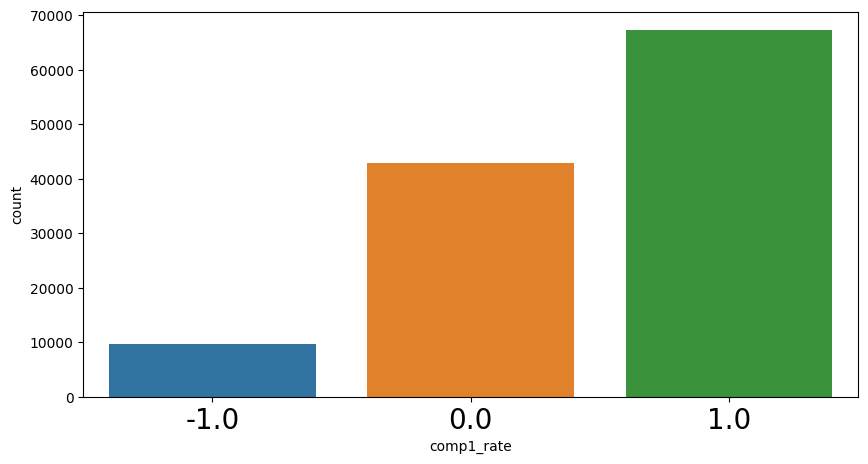

In [ ]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 0, size =20)
sns.countplot(x='comp1_rate', data=df_train)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

train = r"/content/drive/My Drive/DMT data/training_set_VU_DM.csv"
df = pd.read_csv(train)

In [ ]:
a = df[df['click_bool'] == 0]
b = df[df['click_bool'] == 1]

aa = a[a['booking_bool'] == 0]
aa1 = a[a['booking_bool'] == 1]

bb = b[b['booking_bool'] == 0]
bb1 = b[b['booking_bool'] == 1]

In [ ]:
click_bool_1 = df[df['click_bool'] == 1]
click_bool_0 = df[df['click_bool'] == 0]

# spilt the data +1 when the displayed sort was random, 0 when the normal sort order was displayed
display_order = click_bool_1[click_bool_1['random_bool'] == 0]
display_random = click_bool_1[click_bool_1['random_bool'] == 1]

# spilt the data if a property is part of a brand or not
brand_display_order = display_order[display_order['prop_brand_bool'] == 1]
not_brand_display_order = display_order[display_order['prop_brand_bool'] == 0]

brand_display_random = display_random[display_random['prop_brand_bool'] == 1]
not_brand_display_random = display_random[display_random['prop_brand_bool'] == 0]

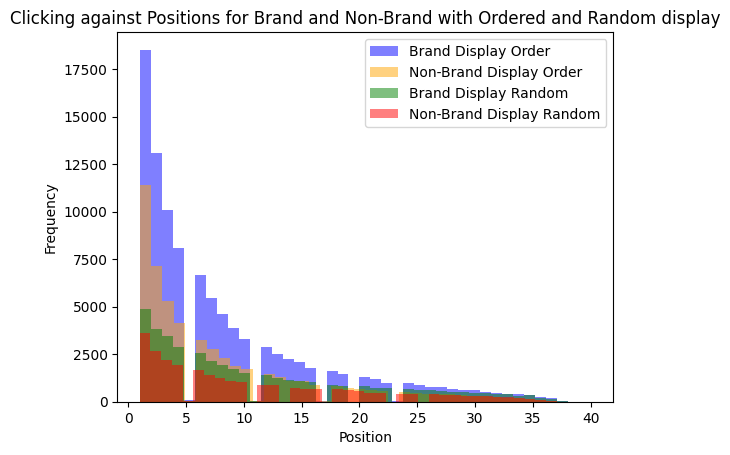

In [ ]:
import matplotlib.pyplot as plt

# Define the data and labels
data = [brand_display_order['position'], not_brand_display_order['position'], brand_display_random['position'], not_brand_display_random['position']]
labels = ['Brand Display Order', 'Non-Brand Display Order', 'Brand Display Random', 'Non-Brand Display Random']
colors = ['blue', 'orange', 'green', 'red']
alpha = 0.5
bins = 40

# Create a single plot with subplots
fig, ax = plt.subplots()

# Plotting each distribution
for i in range(len(data)):
    ax.hist(data[i], bins=bins, label=labels[i], alpha=alpha, color=colors[i])

# Customize the plot
ax.set_xlabel('Position')
ax.set_ylabel('Frequency')
ax.legend()
ax.set_title('Clicking against Positions for Brand and Non-Brand with Ordered and Random display')

# Show the plot
plt.show()


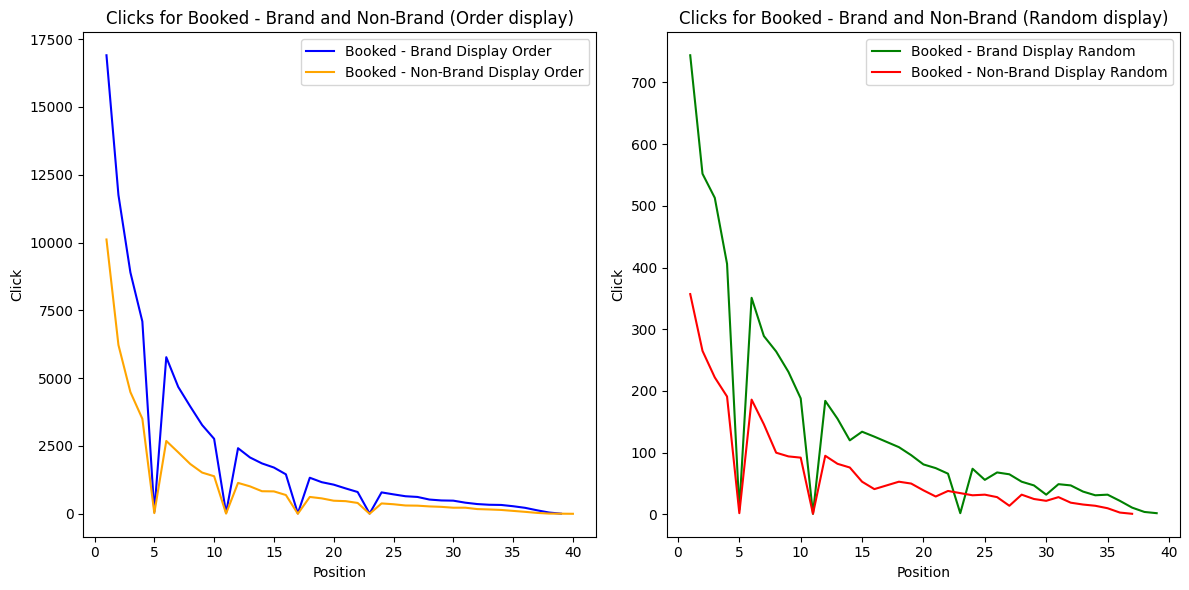

In [ ]:
import matplotlib.pyplot as plt

# Define the number of bins
bins = 40

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting distributions in the first subplot
x_brand_order = brand_display_order['position'][brand_display_order['booking_bool'] == 1].value_counts().sort_index().index
y_brand_order = brand_display_order['position'][brand_display_order['booking_bool'] == 1].value_counts().sort_index().values
x_not_brand_order = not_brand_display_order['position'][not_brand_display_order['booking_bool'] == 1].value_counts().sort_index().index
y_not_brand_order = not_brand_display_order['position'][not_brand_display_order['booking_bool'] == 1].value_counts().sort_index().values
axes[0].plot(x_brand_order, y_brand_order, color='blue', label='Booked - Brand Display Order')
axes[0].plot(x_not_brand_order, y_not_brand_order, color='orange', label='Booked - Non-Brand Display Order')
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Click')
axes[0].set_title('Clicks for Booked - Brand and Non-Brand (Order display)')
axes[0].legend()

# Plotting distributions in the second subplot
x_brand_random = brand_display_random['position'][brand_display_random['booking_bool'] == 1].value_counts().sort_index().index
y_brand_random = brand_display_random['position'][brand_display_random['booking_bool'] == 1].value_counts().sort_index().values
x_not_brand_random = not_brand_display_random['position'][not_brand_display_random['booking_bool'] == 1].value_counts().sort_index().index
y_not_brand_random = not_brand_display_random['position'][not_brand_display_random['booking_bool'] == 1].value_counts().sort_index().values
axes[1].plot(x_brand_random, y_brand_random, color='green', label='Booked - Brand Display Random')
axes[1].plot(x_not_brand_random, y_not_brand_random, color='red', label='Booked - Non-Brand Display Random')
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Click')
axes[1].set_title('Clicks for Booked - Brand and Non-Brand (Random display)')
axes[1].legend()

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


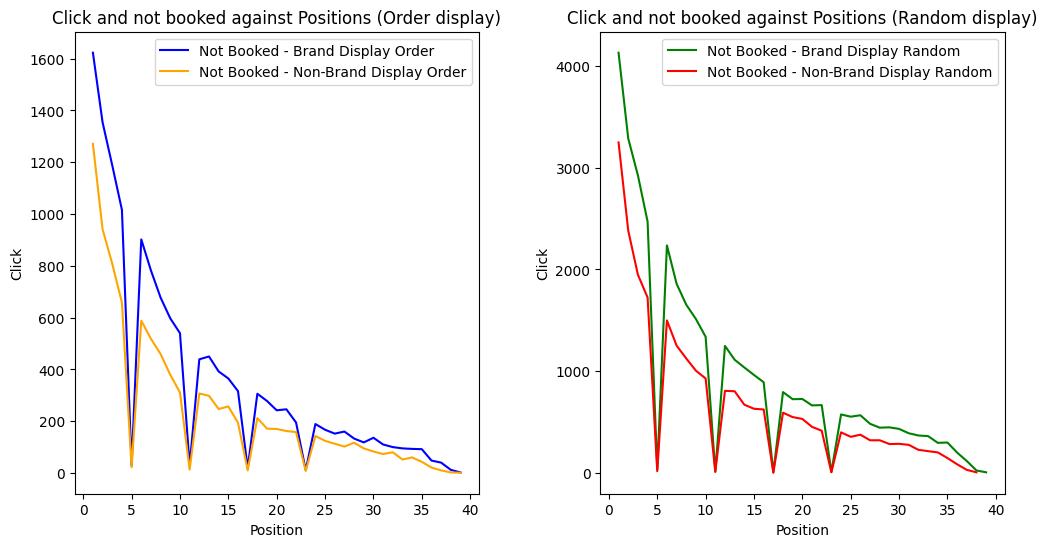

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting distributions in the first subplot
brand_order_clicks = brand_display_order['position'][brand_display_order['booking_bool'] == 0].value_counts().sort_index()
not_brand_order_clicks = not_brand_display_order['position'][not_brand_display_order['booking_bool'] == 0].value_counts().sort_index()
axes[0].plot(brand_order_clicks.index, brand_order_clicks.values, label='Not Booked - Brand Display Order', color='blue')
axes[0].plot(not_brand_order_clicks.index, not_brand_order_clicks.values, label='Not Booked - Non-Brand Display Order', color='orange')
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Click')
axes[0].set_title('Click and not booked against Positions (Order display)')
axes[0].legend()

# Plotting distributions in the second subplot
brand_random_clicks = brand_display_random['position'][brand_display_random['booking_bool'] == 0].value_counts().sort_index()
not_brand_random_clicks = not_brand_display_random['position'][not_brand_display_random['booking_bool'] == 0].value_counts().sort_index()
axes[1].plot(brand_random_clicks.index, brand_random_clicks.values, label='Not Booked - Brand Display Random', color='green')
axes[1].plot(not_brand_random_clicks.index, not_brand_random_clicks.values, label='Not Booked - Non-Brand Display Random', color='red')
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Click')
axes[1].set_title('Click and not booked against Positions (Random display)')
axes[1].legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


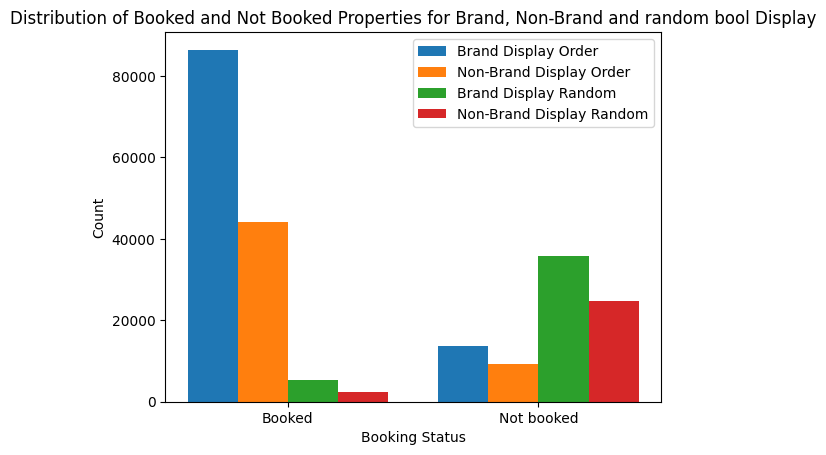

In [ ]:
# Count the number of booked and not booked properties for each category
brand_display_order_counts = brand_display_order['booking_bool'].value_counts()
not_brand_display_order_counts = not_brand_display_order['booking_bool'].value_counts()
brand_display_random_counts = brand_display_random['booking_bool'].value_counts()
not_brand_display_random_counts = not_brand_display_random['booking_bool'].value_counts()

# Define the x positions for the bars
bar_width = 0.2
index = np.arange(2)

# Create a bar plot
plt.bar(index, [brand_display_order_counts[1], brand_display_order_counts[0]],width=bar_width, label='Brand Display Order')
plt.bar(index + bar_width, [not_brand_display_order_counts[1], not_brand_display_order_counts[0]],width=bar_width, label='Non-Brand Display Order')
plt.bar(index +2* bar_width,[brand_display_random_counts[1], brand_display_random_counts[0]],width=bar_width, label='Brand Display Random')
plt.bar(index +3* bar_width,[not_brand_display_random_counts[1], not_brand_display_random_counts[0]],width=bar_width, label='Non-Brand Display Random')

# Customize the plot
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.xticks(index + 1.5 * bar_width, ['Booked','Not booked'])
plt.legend()
plt.title('Distribution of Booked and Not Booked Properties for Brand, Non-Brand and random bool Display')
# Show the plot
plt.show()

In [ ]:
df = pd.read_csv("/content/drive/My Drive/DMT data/training_cleaned.csv")

FileNotFoundError: ignored

In [ ]:
for col in df.columns:
    if df[col].dtype != np.float_:
        print('Unique values for {}: {}'.format(col, len(np.unique(df[col]))))

Unique values for srch_id: 199795
Unique values for date_time: 198615
Unique values for site_id: 34
Unique values for visitor_location_country_id: 210
Unique values for prop_country_id: 172
Unique values for prop_id: 129113
Unique values for prop_starrating: 6
Unique values for prop_brand_bool: 2
Unique values for position: 40
Unique values for promotion_flag: 2
Unique values for srch_destination_id: 18127
Unique values for srch_length_of_stay: 36
Unique values for srch_booking_window: 429
Unique values for srch_adults_count: 9
Unique values for srch_children_count: 10
Unique values for srch_room_count: 8
Unique values for srch_saturday_night_bool: 2
Unique values for random_bool: 2
Unique values for click_bool: 2
Unique values for booking_bool: 2


In [ ]:
# NOTE: What do we do with the groups that have no booking????
booked = list(df.groupby('srch_id')['booking_bool'].agg('sum'))
booked = [1 if booking > 0 else 0 for booking in booked]
clicked = list(df.groupby('srch_id')['click_bool'].agg('sum'))
clicked = [1 if clicks > 0 else 0 for clicks in clicked]

print('Percentage of searches that resulted in a booking: {:.2f}%'.format(sum(booked) / len(booked) * 100))
print('Percentage of searches that resulted in a click: {:.2f}%'.format(sum(clicked) / len(clicked) * 100))
print('Amount of distinct searches: {}'.format(len(np.unique(np.array(df['srch_id'])))))

Percentage of searches that resulted in a booking: 69.27%
Percentage of searches that resulted in a click: 100.00%
Amount of distinct searches: 199795


In [ ]:
# Plot the correlation heatmap of all features.
df_hotel = pd.read_csv('/content/drive/My Drive/DMT data/hotel_data.csv')
# df_corr = df.join(df_hotel.set_index('prop_id'), lsuffix='agg_', on='prop_id')
df_corr = df_hotel.corr()
msk = np.triu(np.ones_like(df_corr))

plt.figure(figsize=(26, 12), dpi=300)
ax = heatmap = sns.heatmap(df_corr, mask=msk, vmin=-1, vmax=1, annot=True, cmap='BrBG', annot_kws={"fontsize":10})

# ax.tick_params(labelsize=16)

cbar = ax.collections[0].colorbar
# cbar.ax.tick_params(labelsize=15)

heatmap.set_title('Pearson Correlation for Filtered Features', fontdict={'fontsize':19}, pad=12)
# plt.tight_layout()
plt.xticks(rotation=45)
plt.savefig('pearson_vars.pdf')

FileNotFoundError: ignored

In [ ]:
df = pd.read_csv("/content/drive/My Drive/DMT data/test_cleaned_final.csv")

In [ ]:
print(df.columns)

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'srch_id', 'date_time',
       'site_id', 'visitor_location_country_id', 'visitor_hist_starrating',
       'visitor_hist_adr_usd', 'prop_country_id', 'prop_id', 'prop_starrating',
       'prop_review_score', 'prop_brand_bool', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'position',
       'price_usd', 'promotion_flag', 'srch_destination_id',
       'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
       'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool',
       'orig_destination_distance', 'random_bool', 'click_bool',
       'booking_bool', 'srch_hist_bool', 'srch_query_affinity_score'],
      dtype='object')


In [ ]:
df=df.drop(['comp2_rate', 'comp2_inv', 'comp3_rate', 'comp3_inv', 'comp5_rate', 'comp5_inv', 'comp8_rate', 'comp8_inv'], axis=1)

In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'srch_id', 'date_time', 'site_id',
       'visitor_location_country_id', 'visitor_hist_starrating',
       'visitor_hist_adr_usd', 'prop_country_id', 'prop_id', 'prop_starrating',
       'prop_review_score', 'prop_brand_bool', 'prop_location_score1',
       'prop_location_score2', 'prop_log_historical_price', 'position',
       'price_usd', 'promotion_flag', 'srch_destination_id',
       'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
       'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool',
       'orig_destination_distance', 'random_bool', 'comp2_rate', 'comp2_inv',
       'comp3_rate', 'comp3_inv', 'comp5_rate', 'comp5_inv', 'comp8_rate',
       'comp8_inv', 'click_bool', 'booking_bool', 'srch_hist_bool'],
      dtype='object')

In [ ]:
srch_query_affinity_score = df['srch_query_affinity_score']
srch_query_affinity_score

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
4958342   NaN
4958343   NaN
4958344   NaN
4958345   NaN
4958346   NaN
Name: srch_query_affinity_score, Length: 4958347, dtype: float64

In [ ]:
minimum_value = df['srch_query_affinity_score'].min()
minimum_value

-326.5675

In [ ]:
df['srch_query_affinity_score'].fillna(-400, inplace=True)


In [ ]:
df.to_csv("/content/drive/My Drive/DMT data/training_cleaned_new.csv")

KeyboardInterrupt: ignored